In [1]:
# Import packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from collections import Counter
from parse import preprocess

In [2]:
# Function to show classification report for Cross Validation
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [3]:
# Conduct High Correlation Filter

# Conduct mapping for Feature Names
featureName_mapping = {
    "A1_1" : "Vitamin B12 (pmol/L)",
    "A1_2" : "Serum Folate (nmol/L)",
    "A2_1" : "Serum Homocysteine (µmol/L)",
    "A3_1" : "25-hydroxy Vitamin D (nmol/L)",
    "B1_a" : "Haemoglobin (g/L)",
    "B1_a1" : "RBC (/L)",
    "B1_a2" : "PCV (L/L)",
    "B1_a3" : "MCV (fL)",
    "B1_a4" : "MCH (pg)",
    "B1_a5" : "MCHC (g/L)",
    "B1_a6" : "RDW (%)",
    "B1_b" : "White Cell Count (/L)",
    "B1_b1" : "Neutrophils (/L)",
    "B1_b2" : "Lymphocytes (/L)",
    "B1_b3" : "Monocytes (/L)",
    "B1_b4" : "Eosinophils (/L)",
    "B1_b5" : "Basophils (/L)",
    "B1_c" : "Platelets (/L)",
    "B1_d" : "Glucose (mmol/L)",
    "B2_a1" : "Total Cholesterol (mmol/L)",
    "B2_a2" : "Triglyceride (mmol/L)",
    "B2_a3" : "HDL Cholesterol (mmol/L)",
    "B2_a4" : "LDL Cholesterol (mmol/L)",
    "B2_a5" : "Total Cholesterol/HDL Ratio",
    "B2_b1" : "Sodium (mmol/L)",
    "B2_b2" : "Potassium (mmol/L)",
    "B2_b3" : "Chloride (mmol/L)",
    "B2_c1" : 'Urea (mmol/L)',
    "B2_c2" : "Creatinine (umol/L)",
    "B2_c3" : "eGFR (mL/min/1.73m2)",
    "B2_c4" : "Uric Acid (mmol/L)",
    "B2_c5" : "Calcium (mmol/L)",
    "B2_c6" : "Corrected Calcium (mmol/L)",
    "B2_c7" : "Phosphate (mmol/L)",
    "B2_d1" : "Total Protein (g/L)",
    "B2_d2" : "Albumin (g/L)",
    "B2_d3" : "Globulin (g/L)",
    "B2_d4" : "Albumin/Globulin ratio",
    "B2_d5" : "Alkaline Phosphatase (U/L)",
    "B2_d6" : "Total Bilirubin (µmol/L)",
    "B2_d7" : "GGT",
    "B2_d8" : "AST",
    "B2_d9" : "ALT",
    "B3" : "C-Reactive Protein",
    "B4_a1" : "Protein",
    "B4_a2" : "pH",
    "B4_a3" : "Glucose",
    "B4_a4" : "Ketones",
    "B4_a5" : "S.G.",
    "B4_a6" : "Blood",
    "B4_b1" : "Leucocytes (/L)",
    "B4_b2" : "Erythrocytes (/L)",
    "B4_b3" : "Epithelial Cells",
    "B5_a1" : "Free Thyroxine (FT4) (pmol/L)",
    "B5_a2" : "Thyroid Stimulating Hormone (mIU/L)",
    "B5_a3" : "Free Tri-iodothyronine (FT3) (pmol/L)",
    "B6" : "HbA1c"
}

In [4]:
# Test 1: Using Old Dataset, all the samples of Robust with all the samples of Frail+MCI

In [5]:
# Pre-parse the dataset
data = preprocess("rawfile_blood.csv")

robust          368
prefrail_mci    268
prefrail        250
mci             142
frail_mci        86
frail             9
Name: condition, dtype: int64

####################################################################
Number of Rows of Dataframe:
1123
Number of Columns of Dataframe:
59

####################################################################
Threshold for number of NULLs in a column: 0.1095
Number of Columns before Parsing for Too Many NULLs in a column:
59
Number of Columns after Parsing for Too Many NULLs in a column:
51

Columns Removed:
B1_b5
B4_a1
B4_a3
B4_a4
B4_a6
B4_b1
B4_b3
B5_a1

####################################################################
Number of Columns after dropping A1_2, B1_b4, B2_c3, B4_b2 for inconsistent data types:
47

####################################################################
Number of Rows before Parsing NULLs in data:
1123
Number of Rows after Parsing NULLs in data:
1015


In [6]:
# Taking only Frail+MCI and Robust classes

df1 = data[data.condition == 'frail_mci']
df1 = df1.reset_index(drop=True)

df2 = data[data.condition == 'robust']
df2 = df2.reset_index(drop=True)

data = pd.concat([df1, df2], ignore_index=True)

In [7]:
data.head()

,mtag,condition,A1_1,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,B1_a4,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
0,ME01378,frail_mci,241,20,33.5,150,5.25,0.46,87,29,...,10,21,22,17,1.3,7.0,1.010,0.69,4.7,5.9
1,ME02832,frail_mci,444,16,87.0,134,4.65,0.40,85,28,...,10,14,20,15,13.4,6.0,1.005,1.29,4.5,5.8
2,ME02909,frail_mci,1476,16,57.0,119,3.80,0.36,94,31,...,18,17,35,21,0.2,7.5,1.012,1.90,4.1,5.8
3,ME02998,frail_mci,339,18,63.8,135,4.89,0.42,86,28,...,13,16,25,13,16.8,5.0,1.017,1.32,4.0,6.0
4,ME03061,frail_mci,287,20,95.5,146,5.18,0.44,85,28,...,18,22,25,24,1.4,7.5,1.006,2.94,4.6,6.1


In [8]:
data.tail()

,mtag,condition,A1_1,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,B1_a4,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
414,MV00454,robust,220,19,67.5,138,4.66,0.42,91,30,...,20,10,17,8,6.6,7.0,1.015,1.29,4.5,6.2
415,MV00456,robust,334,18,51.0,139,4.63,0.42,91,30,...,16,22,35,40,1.0,6.0,1.015,1.88,3.9,5.6
416,MV00460,robust,418,17,61.0,122,4.18,0.38,90,29,...,19,20,23,15,0.4,6.5,1.005,3.58,4.0,5.6
417,MV00502,robust,393,18,43.1,136,4.57,0.43,94,30,...,13,11,22,23,0.7,7.0,1.009,0.92,4.1,6.0
418,MV00510,robust,371,24,55.9,127,4.41,0.40,90,29,...,13,14,16,12,7.5,8.0,1.017,2.45,4.5,6.2


In [9]:
c = data['condition'].value_counts()
condition = c.index
c

robust       343
frail_mci     76
Name: condition, dtype: int64

In [10]:
for i in range(len(condition)):
    data['condition'].replace(condition[i], i, inplace = True)

data.head()

,mtag,condition,A1_1,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,B1_a4,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
0,ME01378,1,241,20,33.5,150,5.25,0.46,87,29,...,10,21,22,17,1.3,7.0,1.010,0.69,4.7,5.9
1,ME02832,1,444,16,87.0,134,4.65,0.40,85,28,...,10,14,20,15,13.4,6.0,1.005,1.29,4.5,5.8
2,ME02909,1,1476,16,57.0,119,3.80,0.36,94,31,...,18,17,35,21,0.2,7.5,1.012,1.90,4.1,5.8
3,ME02998,1,339,18,63.8,135,4.89,0.42,86,28,...,13,16,25,13,16.8,5.0,1.017,1.32,4.0,6.0
4,ME03061,1,287,20,95.5,146,5.18,0.44,85,28,...,18,22,25,24,1.4,7.5,1.006,2.94,4.6,6.1


In [11]:
data.tail()

,mtag,condition,A1_1,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,B1_a4,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
414,MV00454,0,220,19,67.5,138,4.66,0.42,91,30,...,20,10,17,8,6.6,7.0,1.015,1.29,4.5,6.2
415,MV00456,0,334,18,51.0,139,4.63,0.42,91,30,...,16,22,35,40,1.0,6.0,1.015,1.88,3.9,5.6
416,MV00460,0,418,17,61.0,122,4.18,0.38,90,29,...,19,20,23,15,0.4,6.5,1.005,3.58,4.0,5.6
417,MV00502,0,393,18,43.1,136,4.57,0.43,94,30,...,13,11,22,23,0.7,7.0,1.009,0.92,4.1,6.0
418,MV00510,0,371,24,55.9,127,4.41,0.40,90,29,...,13,14,16,12,7.5,8.0,1.017,2.45,4.5,6.2


In [12]:
y = data['condition']

features = ['A1_1', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6']
X_old = data[features]

X = X_old
X = StandardScaler().fit_transform(X_old)
X = MinMaxScaler().fit_transform(X_old)

In [13]:
# HOLDOUT METHOD:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

# Logistic Regression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print("Logistic Regression:", log_model.score(X_test, y_test).round(3))

# Linear Discriminant Analysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
print("Linear Discriminant Analysis:", lda_model.score(X_test, y_test).round(3))

# K-Nearest Neigbors

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print("K-Nearest Neigbors:", knn_model.score(X_test, y_test).round(3))

# Classification and Regression Trees

cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)
print("Classification and Regression Trees:", cart_model.score(X_test, y_test).round(3))

# Gaussian Naive Bayes

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
print("Gaussian Naive Bayes:", gnb_model.score(X_test, y_test).round(3))

# Support Vector Machines

svm_model = SVC(kernel='linear', gamma = 'auto')
svm_model.fit(X_train, y_train)
print("Support Vector Machines:", svm_model.score(X_test, y_test).round(3))

# Random Forest Classifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
print("Random Forest Classifier:", rfc_model.score(X_test, y_test).round(3))

Logistic Regression: 0.845
Linear Discriminant Analysis: 0.81
K-Nearest Neigbors: 0.845
Classification and Regression Trees: 0.839
Gaussian Naive Bayes: 0.798
Support Vector Machines: 0.839
Random Forest Classifier: 0.833


In [15]:
# Calculating Performance Metrics for Holdout

In [16]:
# Calculating for Logistic Regression
log_pred = log_model.predict(X_test)

print('Performance Metrics for Logistic Regression:\n')
print(accuracy_score(y_test, log_pred).round(5), '\n')
print(confusion_matrix(y_test, log_pred), '\n')
print(classification_report(y_test, log_pred))

Performance Metrics for Logistic Regression:

0.84524 

[[140   1]
 [ 25   2]] 

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       141
           1       0.67      0.07      0.13        27

    accuracy                           0.85       168
   macro avg       0.76      0.53      0.52       168
weighted avg       0.82      0.85      0.79       168



In [17]:
# Calculating for LDA
lda_pred = lda_model.predict(X_test)

print('Performance Metrics for LDA:\n')
print(accuracy_score(y_test, lda_pred).round(5), '\n')
print(confusion_matrix(y_test, lda_pred), '\n')
print(classification_report(y_test, lda_pred))

Performance Metrics for LDA:

0.80952 

[[125  16]
 [ 16  11]] 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       141
           1       0.41      0.41      0.41        27

    accuracy                           0.81       168
   macro avg       0.65      0.65      0.65       168
weighted avg       0.81      0.81      0.81       168



In [18]:
# Calculating for kNN
knn_pred = knn_model.predict(X_test)

print('Performance Metrics for KNN:\n')
print(accuracy_score(y_test, knn_pred).round(5), '\n')
print(confusion_matrix(y_test, knn_pred), '\n')
print(classification_report(y_test, knn_pred))

Performance Metrics for KNN:

0.84524 

[[140   1]
 [ 25   2]] 

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       141
           1       0.67      0.07      0.13        27

    accuracy                           0.85       168
   macro avg       0.76      0.53      0.52       168
weighted avg       0.82      0.85      0.79       168



In [19]:
# Calculating for CART
cart_pred = cart_model.predict(X_test)

print('Performance Metrics for CART:\n')
print(accuracy_score(y_test, cart_pred).round(5), '\n')
print(confusion_matrix(y_test, cart_pred), '\n')
print(classification_report(y_test, cart_pred))

Performance Metrics for CART:

0.83929 

[[129  12]
 [ 15  12]] 

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       141
           1       0.50      0.44      0.47        27

    accuracy                           0.84       168
   macro avg       0.70      0.68      0.69       168
weighted avg       0.83      0.84      0.84       168



In [20]:
# Calculating for GNB
gnb_pred = log_model.predict(X_test)

print('Performance Metrics for GNB:\n')
print(accuracy_score(y_test, gnb_pred).round(5), '\n')
print(confusion_matrix(y_test, gnb_pred), '\n')
print(classification_report(y_test, gnb_pred))

Performance Metrics for GNB:

0.84524 

[[140   1]
 [ 25   2]] 

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       141
           1       0.67      0.07      0.13        27

    accuracy                           0.85       168
   macro avg       0.76      0.53      0.52       168
weighted avg       0.82      0.85      0.79       168



In [21]:
# Calculating for Support Vector Machine
svm_pred = svm_model.predict(X_test)

print('Performance Metrics for SVM:\n')
print(accuracy_score(y_test, svm_pred).round(5), '\n')
print(confusion_matrix(y_test, svm_pred), '\n')
print(classification_report(y_test, svm_pred))

Performance Metrics for SVM:

0.83929 

[[139   2]
 [ 25   2]] 

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       141
           1       0.50      0.07      0.13        27

    accuracy                           0.84       168
   macro avg       0.67      0.53      0.52       168
weighted avg       0.79      0.84      0.79       168



In [22]:
# Calculating for Random Forest Classifier
rfc_pred = rfc_model.predict(X_test)

print('Performance Metrics for RFC:\n')
print(accuracy_score(y_test, rfc_pred).round(5), '\n')
print(confusion_matrix(y_test, rfc_pred), '\n')
print(classification_report(y_test, rfc_pred))

Performance Metrics for RFC:

0.83333 

[[137   4]
 [ 24   3]] 

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       141
           1       0.43      0.11      0.18        27

    accuracy                           0.83       168
   macro avg       0.64      0.54      0.54       168
weighted avg       0.78      0.83      0.79       168



In [23]:
# Obtain the top features from the classification results

# Logistic Regression

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(log_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Potassium (mmol/L),1
Serum Homocysteine (µmol/L),1
25-hydroxy Vitamin D (nmol/L),1
Haemoglobin (g/L),1
RBC (/L),1
PCV (L/L),1
ALT,1
Urea (mmol/L),1
Sodium (mmol/L),1
Monocytes (/L),1


In [24]:
# Linear Discriminant Analysis

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(lda_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Serum Homocysteine (µmol/L),1
25-hydroxy Vitamin D (nmol/L),1
ALT,1
RBC (/L),1
PCV (L/L),1
MCV (fL),1
AST,1
GGT,1
White Cell Count (/L),1
Neutrophils (/L),1


In [25]:
# Classification and Regression Trees

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(cart_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Potassium (mmol/L),1
S.G.,1
ALT,1
Haemoglobin (g/L),1
Uric Acid (mmol/L),1
PCV (L/L),1
MCV (fL),1
Glucose (mmol/L),1
Platelets (/L),1
Monocytes (/L),1


In [26]:
# Support Vector Machines

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(svm_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Vitamin B12 (pmol/L),1
ALT,1
AST,1
Urea (mmol/L),1
Monocytes (/L),1
Neutrophils (/L),1
Potassium (mmol/L),1
Serum Homocysteine (µmol/L),1
25-hydroxy Vitamin D (nmol/L),1
PCV (L/L),1


In [27]:
# Random Forest Classifier

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(rfc_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Potassium (mmol/L),1
Serum Homocysteine (µmol/L),1
25-hydroxy Vitamin D (nmol/L),1
Haemoglobin (g/L),1
PCV (L/L),1
ALT,1
Urea (mmol/L),1
Free Tri-iodothyronine (FT3) (pmol/L),1
Glucose (mmol/L),1
Neutrophils (/L),1


C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


>LOG 0.757 (0.092)
>LDA 0.748 (0.064)
>CART 0.710 (0.079)
>SVM 0.713 (0.086)
>RFC 0.714 (0.086)


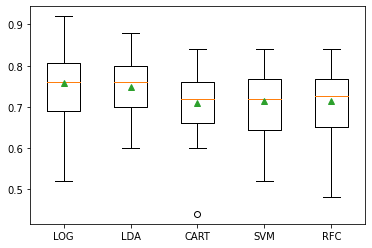

In [28]:
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt

# get a list of models to evaluate
def get_models():
    models = dict()
    # Logistic Regression
    rfe = RFE(log_model, 10)
    model = DecisionTreeClassifier()
    models['LOG'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Linear Discriminant Analysis
    rfe = RFE(lda_model, 10)
    model = DecisionTreeClassifier()
    models['LDA'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Classification & Regression Trees
    rfe = RFE(cart_model, 10)
    model = DecisionTreeClassifier()
    models['CART'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Support Vector Machines
    rfe = RFE(svm_model, 10)
    model = DecisionTreeClassifier()
    models['SVM'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Random Forest Classifier
    rfe = RFE(rfc_model, 10)
    model = DecisionTreeClassifier()
    models['RFC'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [29]:
# CROSS-VALIDATION:

In [30]:
# Logistic Regression

log_model = LogisticRegression()
log_model.fit(X, y)
scores = cross_val_score(log_model, X, y, cv=5)
print("Logistic Regression: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Linear Discriminant Analysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X, y)
scores = cross_val_score(lda_model, X, y, cv=5)
print("Linear Discriminant Analysis: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# K-Nearest Neigbors

knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
scores = cross_val_score(knn_model, X, y, cv=5)
print("K-Nearest Neighbors: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Classification and Regression Trees

cart_model = DecisionTreeClassifier()
cart_model.fit(X, y)
scores = cross_val_score(cart_model, X, y, cv=5)
print("Classification and Regression Trees: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Gaussian Naive Bayes

gnb_model = GaussianNB()
gnb_model.fit(X, y)
scores = cross_val_score(gnb_model, X, y, cv=5)
print("Gaussian Naive Bayes: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Support Vector Machines

svm_model = SVC(kernel='linear', gamma = 'auto')
svm_model.fit(X, y)
scores = cross_val_score(svm_model, X, y, cv=5)
print("Support Vector Machines: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Random Forest Classifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
scores = cross_val_score(rfc_model, X, y, cv=5)
print("Random Forest Classifier: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

Logistic Regression: 0.816 accuracy with a standard deviation of 0.020
Linear Discriminant Analysis: 0.809 accuracy with a standard deviation of 0.025
K-Nearest Neighbors: 0.821 accuracy with a standard deviation of 0.012
Classification and Regression Trees: 0.714 accuracy with a standard deviation of 0.059
Gaussian Naive Bayes: 0.802 accuracy with a standard deviation of 0.029
Support Vector Machines: 0.816 accuracy with a standard deviation of 0.014
Random Forest Classifier: 0.823 accuracy with a standard deviation of 0.013


In [31]:
# Producing Cross-Validation Classification Reports for each Algorithm

In [32]:
# Logistic Regression
scores = cross_val_score(log_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89        68
           1       0.00      0.00      0.00        16

    accuracy                           0.80        84
   macro avg       0.40      0.49      0.44        84
weighted avg       0.65      0.80      0.72        84

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        69
           1       0.33      0.07      0.11        15

    accuracy                           0.81        84
   macro avg       0.58      0.52      0.50        84
weighted avg       0.74      0.81      0.75        84

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        69
           1       0.33      0.07      0.11        15

    accuracy                           0.81        84
   macro avg       0.58      0.52      0.50        84
weighted avg       0.74      0.81      0.75        84

              preci

In [33]:
# Linear Discriminant Analysis
scores = cross_val_score(lda_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        68
           1       0.44      0.25      0.32        16

    accuracy                           0.80        84
   macro avg       0.64      0.59      0.60        84
weighted avg       0.76      0.80      0.77        84

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        69
           1       0.38      0.33      0.36        15

    accuracy                           0.79        84
   macro avg       0.62      0.61      0.61        84
weighted avg       0.77      0.79      0.78        84

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        69
           1       0.41      0.47      0.44        15

    accuracy                           0.79        84
   macro avg       0.65      0.66      0.65        84
weighted avg       0.80      0.79      0.79        84

              preci

In [34]:
# K-Nearest Neigbors
knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
scores = cross_val_score(knn_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        68
           1       0.00      0.00      0.00        16

    accuracy                           0.81        84
   macro avg       0.40      0.50      0.45        84
weighted avg       0.66      0.81      0.72        84

              precision    recall  f1-score   support

           0       0.83      0.99      0.90        69
           1       0.50      0.07      0.12        15

    accuracy                           0.82        84
   macro avg       0.66      0.53      0.51        84
weighted avg       0.77      0.82      0.76        84

              precision    recall  f1-score   support

           0       0.83      0.99      0.90        69
           1       0.50      0.07      0.12        15

    accuracy                           0.82        84
   macro avg       0.66      0.53      0.51        84
weighted avg       0.77      0.82      0.76        84

              preci

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# Classification and Regression Trees
cart_model = DecisionTreeClassifier()
cart_model.fit(X, y)
scores = cross_val_score(cart_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        68
           1       0.27      0.19      0.22        16

    accuracy                           0.75        84
   macro avg       0.55      0.53      0.54        84
weighted avg       0.72      0.75      0.73        84

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        69
           1       0.14      0.20      0.16        15

    accuracy                           0.63        84
   macro avg       0.47      0.46      0.46        84
weighted avg       0.69      0.63      0.66        84

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        69
           1       0.25      0.33      0.29        15

    accuracy                           0.70        84
   macro avg       0.55      0.56      0.55        84
weighted avg       0.74      0.70      0.72        84

              preci

In [36]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X, y)
scores = cross_val_score(gnb_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.85      0.94      0.90        68
           1       0.56      0.31      0.40        16

    accuracy                           0.82        84
   macro avg       0.70      0.63      0.65        84
weighted avg       0.80      0.82      0.80        84

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        69
           1       0.44      0.47      0.45        15

    accuracy                           0.80        84
   macro avg       0.66      0.67      0.66        84
weighted avg       0.80      0.80      0.80        84

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        69
           1       0.27      0.20      0.23        15

    accuracy                           0.76        84
   macro avg       0.55      0.54      0.54        84
weighted avg       0.74      0.76      0.75        84

              preci

In [37]:
# Support Vector Machines
svm_model = SVC(kernel='linear', gamma = 'auto')
svm_model.fit(X, y)
scores = cross_val_score(svm_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89        68
           1       0.00      0.00      0.00        16

    accuracy                           0.80        84
   macro avg       0.40      0.49      0.44        84
weighted avg       0.65      0.80      0.72        84

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        69
           1       0.33      0.07      0.11        15

    accuracy                           0.81        84
   macro avg       0.58      0.52      0.50        84
weighted avg       0.74      0.81      0.75        84

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        69
           1       0.33      0.07      0.11        15

    accuracy                           0.81        84
   macro avg       0.58      0.52      0.50        84
weighted avg       0.74      0.81      0.75        84

              preci

In [38]:
# Random Forest Classifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
scores = cross_val_score(rfc_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89        68
           1       0.00      0.00      0.00        16

    accuracy                           0.80        84
   macro avg       0.40      0.49      0.44        84
weighted avg       0.65      0.80      0.72        84

              precision    recall  f1-score   support

           0       0.82      0.96      0.89        69
           1       0.25      0.07      0.11        15

    accuracy                           0.80        84
   macro avg       0.54      0.51      0.50        84
weighted avg       0.72      0.80      0.75        84

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        69
           1       0.67      0.27      0.38        15

    accuracy                           0.85        84
   macro avg       0.76      0.62      0.65        84
weighted avg       0.82      0.85      0.82        84

              preci

In [39]:
# Logistic Regression

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(log_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Potassium (mmol/L),1
Serum Homocysteine (µmol/L),1
25-hydroxy Vitamin D (nmol/L),1
Haemoglobin (g/L),1
RBC (/L),1
PCV (L/L),1
ALT,1
Urea (mmol/L),1
Sodium (mmol/L),1
Monocytes (/L),1


In [40]:
# Linear Discriminant Analysis

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(lda_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Serum Homocysteine (µmol/L),1
25-hydroxy Vitamin D (nmol/L),1
ALT,1
RBC (/L),1
PCV (L/L),1
MCV (fL),1
AST,1
GGT,1
White Cell Count (/L),1
Neutrophils (/L),1


In [41]:
# Classification and Regression Trees

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(cart_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Potassium (mmol/L),1
ALT,1
Phosphate (mmol/L),1
Haemoglobin (g/L),1
PCV (L/L),1
MCV (fL),1
Urea (mmol/L),1
Glucose (mmol/L),1
Platelets (/L),1
Monocytes (/L),1


In [42]:
# Support Vector Machines

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(svm_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Vitamin B12 (pmol/L),1
ALT,1
AST,1
Urea (mmol/L),1
Monocytes (/L),1
Neutrophils (/L),1
Potassium (mmol/L),1
Serum Homocysteine (µmol/L),1
25-hydroxy Vitamin D (nmol/L),1
PCV (L/L),1


In [43]:
# Random Forest Classifier

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(rfc_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Vitamin B12 (pmol/L),1
C-Reactive Protein,1
ALT,1
Urea (mmol/L),1
Free Tri-iodothyronine (FT3) (pmol/L),1
Glucose (mmol/L),1
Neutrophils (/L),1
Potassium (mmol/L),1
25-hydroxy Vitamin D (nmol/L),1
Haemoglobin (g/L),1


C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


>LOG 0.757 (0.079)
>LDA 0.743 (0.072)
>CART 0.713 (0.067)
>SVM 0.718 (0.067)
>RFC 0.725 (0.085)


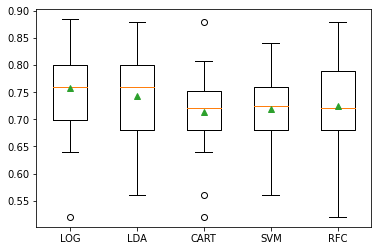

In [44]:
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt

# get a list of models to evaluate
def get_models():
    models = dict()
    # Logistic Regression
    rfe = RFE(log_model, 10)
    model = DecisionTreeClassifier()
    models['LOG'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Linear Discriminant Analysis
    rfe = RFE(lda_model, 10)
    model = DecisionTreeClassifier()
    models['LDA'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Classification & Regression Trees
    rfe = RFE(cart_model, 10)
    model = DecisionTreeClassifier()
    models['CART'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Support Vector Machines
    rfe = RFE(svm_model, 10)
    model = DecisionTreeClassifier()
    models['SVM'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Random Forest Classifier
    rfe = RFE(rfc_model, 10)
    model = DecisionTreeClassifier()
    models['RFC'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()